# Data Loading

In [ ]:
! pip install -q kaggle # '-q' =>to clear the o/p cell after installing

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemansky","key":"0ae542a17db1b6c29f14bda9016f11a5"}'}

In [ ]:
! mkdir ~/.kaggle # making a directory

In [ ]:
! cp kaggle.json ~/.kaggle/ # copying the kaggle.json file to the .kaggle directory.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json # implie , the ower has full right for read and write the file .

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle # Upgrading the kaggle API

     |████████████████████████████████| 61kB 6.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=78bf402e7f4d05faafdb600871c83508215fb44b2c88d71e3e57c7d02543deb7
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

 90% 57.0M/63.2M [00:00<00:00, 142MB/s]
100% 63.2M/63.2M [00:00<00:00, 151MB/s]


In [ ]:
! unzip '/content/age-gender-and-ethnicity-face-data-csv.zip'

Archive:  /content/age-gender-and-ethnicity-face-data-csv.zip
  inflating: age_gender.csv          


## Importing relevent libraries <a id="01"></a>

In [ ]:
import numpy as np 
import pandas as pd
import random
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff # creats a figure instance

from sklearn.model_selection import train_test_split

## Loading Dataset <a id="02"></a>

In [ ]:
data = pd.read_csv('/content/age_gender.csv')

## Converting pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32")) # by default delimeter is a space.

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


# EDA

In [ ]:
for i in random.sample(data.pixels.tolist() , 5):
    print(i.shape)

(2304,)
(2304,)
(2304,)
(2304,)
(2304,)


So ,e ach image is of the shape of $48 \times 48 \times 1$ .

In [ ]:
print(f'Total rows: {len(data)}')
print(f'Total columns: {len(data.columns)}')

Total rows: 23705
Total columns: 5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


$Input~Summary$

$\bullet$So , No null value is present in the dataset.

$\bullet$'image_name' and 'pixels' are of object type.

$\bullet$ There are total 23705 images present in the dataset.

In [ ]:
data.ethnicity.value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

## Distributions <a id="03"></a>

In [ ]:
## normalizing pixels data
data['pixels'] = data['pixels'].apply(lambda x: x/255)

## calculating distributions
age_dist = data['age'].value_counts()
ethnicity_dist = data['ethnicity'].value_counts()
gender_dist = data['gender'].value_counts().rename(index={0:'Male',1:'Female'})

'''
def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()'''

'\ndef ditributi\n\non_plot(x,y,name):\n    fig = go.Figure([\n        go.Bar(x=x, y=y)\n    ])\n\n    fig.update_layout(title_text=name)\n    fig.show()'

### Age Distribtion <a id="3.1"></a>

In [ ]:
# ditribution_plot(x=age_dist.index, y=age_dist.values, name='Age Distribution')

In [ ]:
age_data = [data.age.values]

In [ ]:
fig0 = ff.create_distplot(age_data, ['age'])
fig0.update_layout(title_text = 'Age Distribution plot')
fig0.show()

So ,there is a promiment data imbalanc in data.age .

### Ethnicity Distribution <a id="3.2"></a>

In [ ]:
data.ethnicity.unique()

array([2, 3, 4, 0, 1])

In [ ]:
# ditribution_plot(x=ethnicity_dist.index, y=ethnicity_dist.values, name='Ethnicity Distribution')

In [ ]:
ethnicity_data =[data.ethnicity.values] 
fig1 = ff.create_distplot(ethnicity_data, ['ethnicity_data'])
fig1.update_layout(title_text = 'ethnicity Distribution plot')
fig1.show()

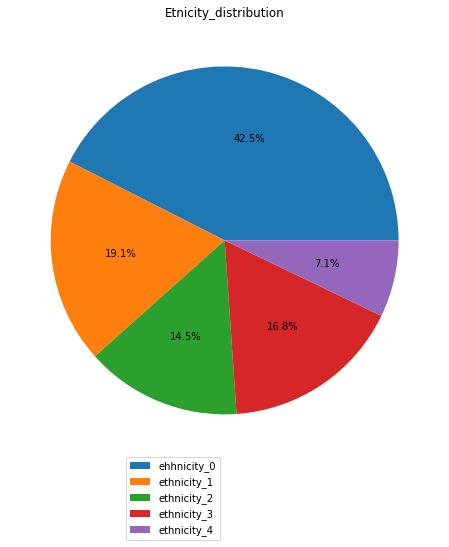

In [ ]:
eth_1 = len(data[data.ethnicity ==1])
eth_0 = len(data[data.ethnicity ==0])
eth_2 = len(data[data.ethnicity==2])
eth_3 = len(data[data.ethnicity ==3])
eth_4 = len(data[data.ethnicity == 4])

ethnicity_stat = [eth_0 ,eth_1 ,eth_2 ,eth_3 ,eth_4]
ethnicity_labels = ['ehhnicity_0' ,'ethnicity_1' ,'ethnicity_2' ,'ethnicity_3' , 'ethnicity_4' ]

fig2 , ax = plt.subplots(1,1,figsize=(10,8))
ax.pie(ethnicity_stat , autopct='%1.1f%%')
ax.set_title('Etnicity_distribution')
ax.legend(ethnicity_labels, loc='lower right', bbox_to_anchor=(0.5, -0.2))

plt.show()

So , about 42% training example belong to Etnicity_0 .

$\implies$ There exist a **data imbalance in ethnicity column .**

### Gender Distribution <a id="3.3"></a>

In [ ]:
# ditribution_plot(x=gender_dist.index, y=gender_dist.values, name='Gender Distribution')

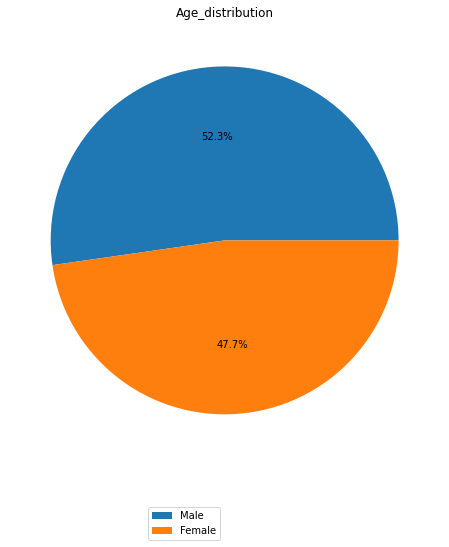

In [ ]:
nb_male = len(data[data.gender ==0])
nb_female = len(data[data.gender ==1])

fig3 , ax = plt.subplots(1,1,figsize=(10,8))
ax.pie([nb_male ,nb_female] , autopct='%1.1f%%')
ax.set_title('Age_distribution')
ax.legend(['Male' ,'Female'], loc='lower right', bbox_to_anchor=(0.5, -0.2))


$Summary$

$\bullet$#  male sample is more than female sample by $4 - 5 \%.$

$\implies$ The data imbalance is **not so promiment in the Age colume** of the data .

### Gender Vs. Ethnicity

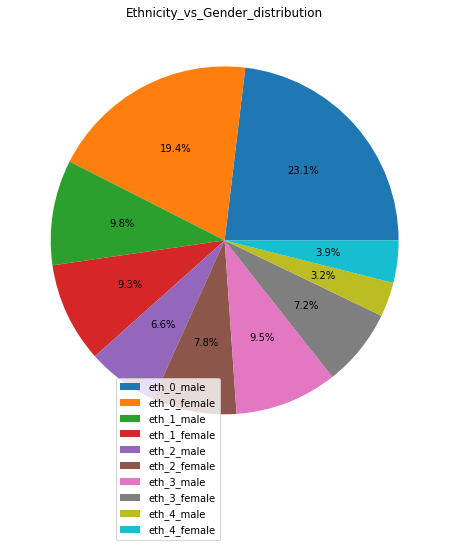

In [ ]:
eth_0_male = len(data[(data.ethnicity ==0) & (data.gender ==0)])
eth_0_female = len(data[(data.ethnicity ==0) & (data.gender ==1)])

eth_1_male = len(data[(data.ethnicity ==1) & (data.gender ==0)])
eth_1_female = len(data[(data.ethnicity ==1) & (data.gender ==1)])

eth_2_male = len(data[(data.ethnicity ==2) & (data.gender ==0)])
eth_2_female = len(data[(data.ethnicity ==2) & (data.gender ==1)])

eth_3_male = len(data[(data.ethnicity ==3) & (data.gender ==0)])
eth_3_female = len(data[(data.ethnicity ==3) & (data.gender ==1)])

eth_4_male = len(data[(data.ethnicity == 4) & (data.gender ==0)])
eth_4_female =len(data[(data.ethnicity ==4) & (data.gender ==1)])

ethnicity_gender_stat =[eth_0_male ,eth_0_female ,eth_1_male ,eth_1_female ,
                       eth_2_male ,eth_2_female ,eth_3_male ,eth_3_female ,
                       eth_4_male ,eth_4_female]

ethnicity_gender_labels =['eth_0_male' ,'eth_0_female' ,'eth_1_male' ,'eth_1_female' ,
                       'eth_2_male' ,'eth_2_female' ,'eth_3_male' ,'eth_3_female' ,
                       'eth_4_male' ,'eth_4_female']



fig4 , ax4 = plt.subplots(1,1,figsize=(10,8))
ax4.pie(ethnicity_gender_stat , autopct='%1.1f%%')
ax4.set_title('Ethnicity_vs_Gender_distribution')
ax4.legend(ethnicity_gender_labels, loc='lower right', bbox_to_anchor=(0.5, -0.2))

$SUMMARY$

$\bullet$ **$23 \%$ belongs to ethnicity_0 and Male.**

$\bullet$ **$19.4 \%$ belongs to ethnicity_0 and Female.**

### Data Preprocessing

In [ ]:
X = np.array(data['pixels'].tolist())

x= []
line_count = 0
for i in X :
    x.append(np.array_split(i ,48))
    line_count+=1

images = np.array(x).astype('float')
print(f'Total number of images processed is {line_count}')
## Converting pixels from 1D to 3D
# X = X.reshape(X.shape[0],48,48,1)


Total number of images processed is 23705


In [ ]:
images.shape

(23705, 48, 48)

In [ ]:
# To add new axis
images = np.expand_dims(images , axis =3)

In [ ]:
#boom ,new axis craeted !!
images.shape

(23705, 48, 48, 1)

### Sample Images <a id="3.4"></a>

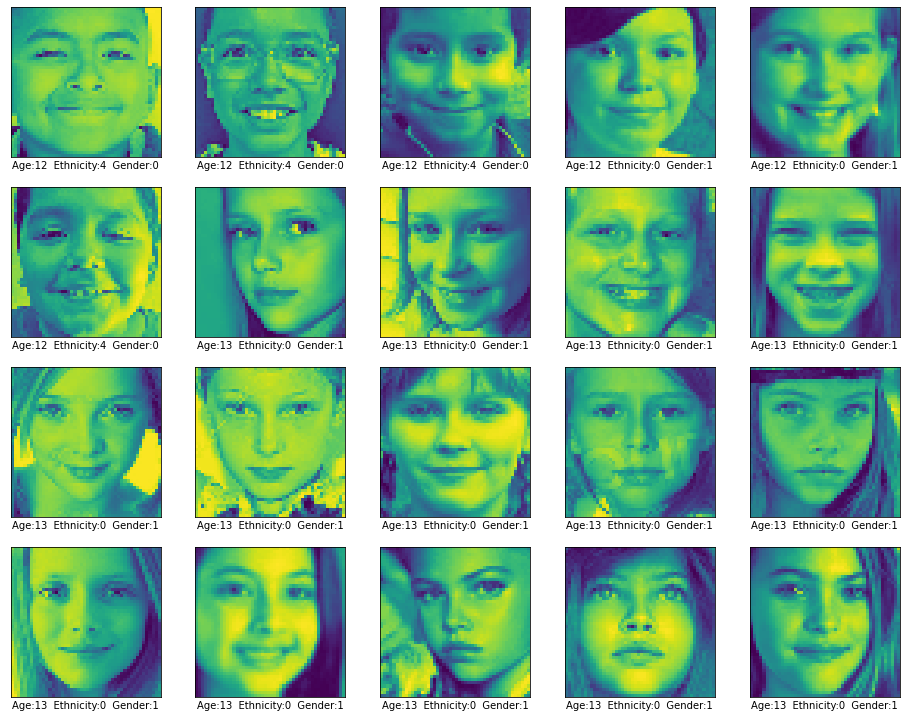

In [ ]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(data['age'].iloc[i])+
        "  Ethnicity:"+str(data['ethnicity'].iloc[i])+
        "  Gender:"+ str(data['gender'].iloc[i])
    )
plt.show()

# Model for Gender Prediction

### Split data into train/test <a id="4.1"></a>

In [ ]:
y_gen = data['gender']

X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(
    images, y_gen, test_size=0.15, random_state=37
)

In [ ]:
print(f'the number of test_sample is {len(X_test_gen)}.')

the number of test_sample is 3556.


### Build and train model <a id="4.2"></a>

In [ ]:
model_gen = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

model_gen.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


## Stop training when validation loss reach 0.2700
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.98):
            print("\nReached 98% val_loss so cancelling training!")
            self.model.stop_training = True
'''
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,factor=0.25, 
                                            min_lr=0.0001)
'''

callback = myCallback()

model_gen.summary()
# tf.keras.utils.plot_model(model ,to_file = 'Model_visualisation')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [ ]:
history_gen = model_gen.fit(
    X_train_gen, y_train_gen, epochs=100, validation_split=0.1, batch_size=64, callbacks=[callback ]
)

Epoch 1/100
284/284 [==============================] - 34s 8ms/step - loss: 0.5243 - accuracy: 0.7356 - val_loss: 0.5809 - val_accuracy: 0.8015
Epoch 2/100
284/284 [==============================] - 2s 7ms/step - loss: 0.3952 - accuracy: 0.8244 - val_loss: 0.3921 - val_accuracy: 0.8496
Epoch 3/100
284/284 [==============================] - 2s 7ms/step - loss: 0.3487 - accuracy: 0.8436 - val_loss: 0.3303 - val_accuracy: 0.8600
Epoch 4/100
284/284 [==============================] - 2s 7ms/step - loss: 0.3294 - accuracy: 0.8530 - val_loss: 0.3197 - val_accuracy: 0.8635
Epoch 5/100
284/284 [==============================] - 2s 7ms/step - loss: 0.3103 - accuracy: 0.8622 - val_loss: 0.3140 - val_accuracy: 0.8680
Epoch 6/100
284/284 [==============================] - 2s 7ms/step - loss: 0.2969 - accuracy: 0.8684 - val_loss: 0.3038 - val_accuracy: 0.8705
Epoch 7/100
284/284 [==============================] - 2s 7ms/step - loss: 0.2857 - accuracy: 0.8769 - val_loss: 0.3117 - val_accuracy: 0.869

### Evaluate training history <a id="4.3"></a>

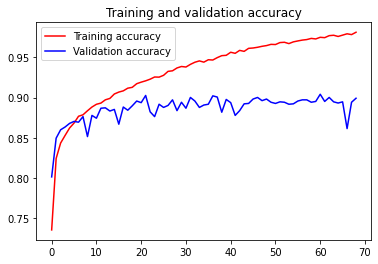

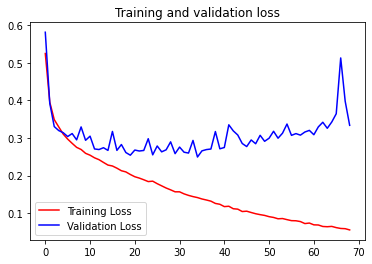

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt



acc = history_gen.history['accuracy']
val_acc = history_gen.history['val_accuracy']
loss = history_gen.history['loss']
val_loss = history_gen.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Accuracy

In [ ]:
loss, acc = model_gen.evaluate(X_test_gen,y_test_gen,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.31827282905578613
Test Accuracy: 0.897075355052948


In [ ]:
X_test_gen.shape

(3556, 48, 48, 1)

In [ ]:
_y_pred =model_gen.predict(X_test_gen)

In [ ]:
y_pred = []
def pred(x):
    for i in x:
        if i>0.5:
            y_pred.append(1)
        else :
            y_pred.append(0)
            
            
pred(_y_pred)

In [ ]:
y_pred = np.array(y_pred)

In [ ]:
y_pred.shape

(3556,)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [ ]:
gen_map ={0:'Male' ,1 :'Female'}

_test_gen =[gen_map[i] for i in y_test_gen]
_y_pred_gen =[gen_map[i] for i in y_pred]

KeyError: ignored

In [ ]:
print(classification_report(_test_gen ,_y_pred_gen))

              precision    recall  f1-score   support

      Female       0.88      0.91      0.90      1744
        Male       0.91      0.88      0.90      1812

    accuracy                           0.90      3556
   macro avg       0.90      0.90      0.90      3556
weighted avg       0.90      0.90      0.90      3556



In [ ]:
cm = confusion_matrix(y_test_gen ,y_pred ,normalize ='true')

Text(51.0, 0.5, 'ground_truth')

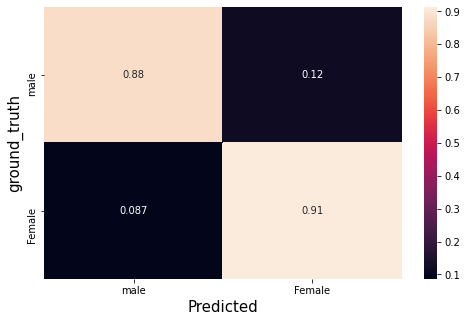

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.heatmap(cm , annot =True , xticklabels = ['male' ,'Female'] ,yticklabels = ['male' ,'Female'])
plt.xlabel('Predicted' , fontsize =15)
plt.ylabel('ground_truth', fontsize =15)

In [ ]:
import 

# Ethnicity

### Split data into train/test <a id="5.1"></a>

In [ ]:
y_eth = data['ethnicity']

X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(
    images, y_eth, test_size=0.01, random_state=37 # optimal =37
)

### Build and train model <a id="5.2"></a>

In [ ]:

model_eth = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    
    L.Conv2D(32, (3, 3), activation='relu'), 
    L.MaxPooling2D((2, 2)),
    L.BatchNormalization(),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.BatchNormalization(),
    
    L.Flatten(),
    L.BatchNormalization(),#added2
    L.Dense(640 ,activation='relu'), # added2
    L.Dropout(rate=0.3), #added , 0.6=optimal ,0.3 giving good result
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.2),#optimal=0.5
    L.Dense(5 ,activation ='softmax')
])




model_eth.compile(optimizer='rmsprop',#'rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', 
                                            patience = 1, #optimal =2 
                                            verbose=1,factor=0.25, 
                                            min_lr=0.000005)

## Stop training when validation accuracy reach 79%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.82):
            print("\nReached 82% val_accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model_eth.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [ ]:
history_eth = model_eth.fit(
    X_train_eth,y_train_eth, epochs=100,  batch_size=16 ,validation_split =0.1 ,callbacks = [learning_rate_reduction ,callback])

Epoch 1/100
1320/1320 [==============================] - 39s 5ms/step - loss: 1.2418 - accuracy: 0.6151 - val_loss: 0.9956 - val_accuracy: 0.6246
Epoch 2/100
1320/1320 [==============================] - 7s 5ms/step - loss: 0.9593 - accuracy: 0.6911 - val_loss: 1.2728 - val_accuracy: 0.6787
Epoch 3/100
1320/1320 [==============================] - 7s 5ms/step - loss: 0.9011 - accuracy: 0.7179 - val_loss: 1.1240 - val_accuracy: 0.6153
Epoch 4/100
1320/1320 [==============================] - 7s 5ms/step - loss: 0.8529 - accuracy: 0.7395 - val_loss: 1.0702 - val_accuracy: 0.7622
Epoch 5/100
1320/1320 [==============================] - 7s 5ms/step - loss: 0.8365 - accuracy: 0.7476 - val_loss: 1.0046 - val_accuracy: 0.7691
Epoch 6/100
1320/1320 [==============================] - 7s 5ms/step - loss: 0.8309 - accuracy: 0.7482 - val_loss: 2.0265 - val_accuracy: 0.7622
Epoch 7/100
1320/1320 [==============================] - 7s 5ms/step - loss: 0.8629 - accuracy: 0.7327 - val_loss: 0.7845 - val_a

### Evaluate training history <a id="5.3"></a>

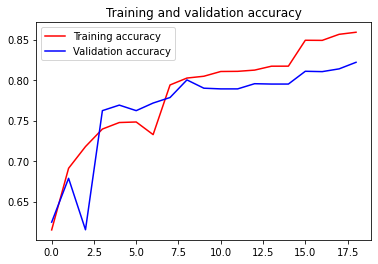

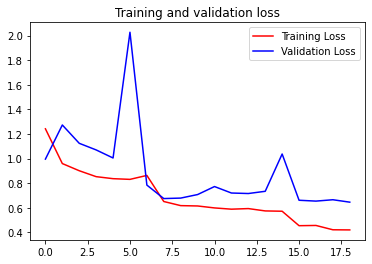

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt



acc = history_eth.history['accuracy']
val_acc = history_eth.history['val_accuracy']
loss = history_eth.history['loss']
val_loss = history_eth.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix

In [ ]:
_y_pred = model_eth(X_test_eth)

y_pred = []
for i in _y_pred :
  y_pred.append(np.argmax(i))


In [ ]:
y_pred =np.array(y_pred)

In [ ]:
'''#etnicity mapping

eth_map = {0:'Indian',1:'African' ,2:'European',3:'Chinese' ,4:'American'}

y_pred_eth = [eth_map[i] for i in y_pred]

_y_test_eth = [eth_map[i] for i in y_test_eth]'''

In [ ]:
print(classification_report(y_pred ,y_test_eth))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       107
           1       0.83      0.96      0.89        50
           2       0.94      0.87      0.91        39
           3       0.84      0.62      0.71        42
           4       0.00      0.00      0.00         0

    accuracy                           0.82       238
   macro avg       0.70      0.65      0.67       238
weighted avg       0.88      0.82      0.85       238



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



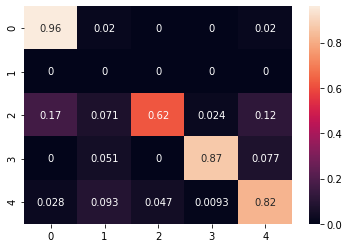

In [ ]:
import seaborn as sns
cm_eth = confusion_matrix(y_pred_eth ,_y_test_eth ,normalize ='true')
sns.heatmap(cm_eth , annot = True )

 <h1 class="list-group-item active" style='background:skyblue; border:0'>
    <center>ETHNICITY :Phenomenal Investigation</center>
</h1>

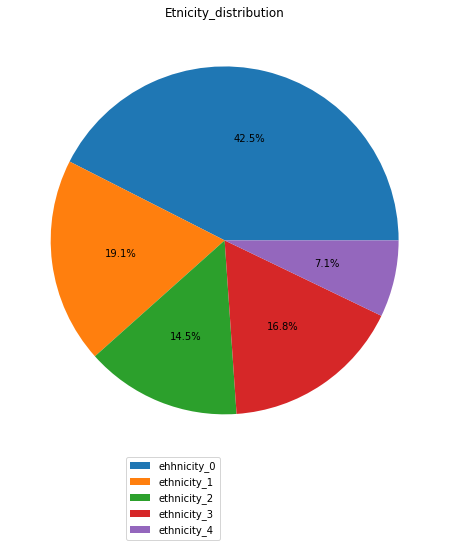

$\bullet$ As, there is a prominent data imbalance in data.ethnicity , there could not be any ideal training for this model .

$\bullet$ As , # sample belong to the ethnicity_0 is the about $\sim 42 \%$, this class has best performance .

$\bullet$ The class that has the least number of sample is ethnicity_4 ,($\sim 7\%$),This is the worst performer.

In this case there ia not even a single example of thee ethnicity_0 class , so the precision and recall both become 0 for ethnicity_0.

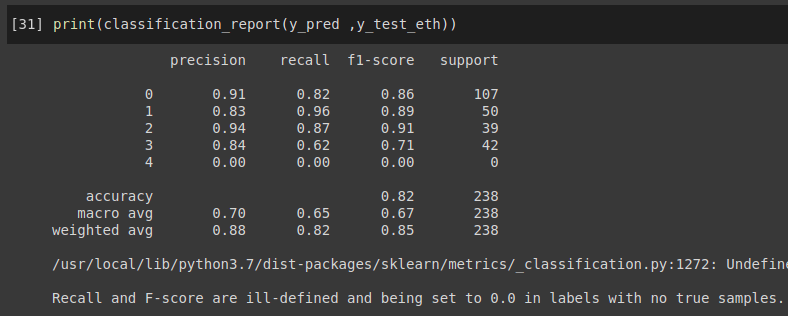



---



---



---



<a id="06"></a>

<h1 class="list-group-item active" style='background:orange; border:0'>
    <center>Model for Age prediction</center>
</h1>

### Split data into train/test <a id="6.1"></a>

In [ ]:
y_age = data['age']

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(
    images, y_age, test_size=0.22, random_state=37
)

### Build and train model <a id="6.2"></a>

In [ ]:
model_age = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.Adam(learning_rate = 0.0001 )# optimal =Adam

model_age.compile(optimizer=sgd,
              loss='mean_squared_error',
              metrics=['mae'])


'''## Stop training when validation loss reach 110
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<110):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()'''
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae', 
                                            patience = 2, 
                                            verbose=1,factor=0.25, 
                                            min_lr=0.0001)

model_age.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)        

In [ ]:
X_train_age.shape

(18489, 48, 48, 1)

In [ ]:
history_age = model_age.fit(
    X_train_age ,y_train_age , epochs=50,  batch_size=32 ,validation_split =0.1 ,callbacks = [learning_rate_reduction]
)

Epoch 1/50
520/520 [==============================] - 3s 5ms/step - loss: 393.4922 - mae: 15.1094 - val_loss: 288.5026 - val_mae: 12.2513
Epoch 2/50
520/520 [==============================] - 2s 5ms/step - loss: 236.6159 - mae: 11.6692 - val_loss: 174.3124 - val_mae: 9.9022
Epoch 3/50
520/520 [==============================] - 2s 5ms/step - loss: 204.9946 - mae: 10.8011 - val_loss: 190.0127 - val_mae: 10.0534
Epoch 4/50
520/520 [==============================] - 3s 5ms/step - loss: 185.6258 - mae: 10.2224 - val_loss: 173.5931 - val_mae: 10.4004
Epoch 5/50
520/520 [==============================] - 2s 5ms/step - loss: 176.6659 - mae: 9.9254 - val_loss: 129.7488 - val_mae: 8.4845
Epoch 6/50
520/520 [==============================] - 2s 5ms/step - loss: 166.8637 - mae: 9.6415 - val_loss: 126.2711 - val_mae: 8.2574
Epoch 7/50
520/520 [==============================] - 2s 5ms/step - loss: 159.6188 - mae: 9.3861 - val_loss: 115.0877 - val_mae: 7.9858
Epoch 8/50
520/520 [=====================

### Evaluate training history <a id="6.3"></a> 

In [ ]:
mse, mae = model_age.evaluate(X_test_age,y_test_age,verbose=0)
print('Test Mean squared error: {}'.format(mse))
print('Test Mean absolute error: {}'.format(mae))

Test Mean squared error: 96.97100067138672
Test Mean absolute error: 7.387067794799805


# Test

In [ ]:
model_gen.predict(images[200:209])

array([[3.6160934e-01],
       [2.0399473e-04],
       [2.1745507e-01],
       [1.2050141e-01],
       [5.0013922e-03],
       [5.2695259e-02],
       [7.4913993e-02],
       [2.2406293e-02],
       [3.9750114e-01]], dtype=float32)

In [ ]:
images[0].shape

(48, 48, 1)

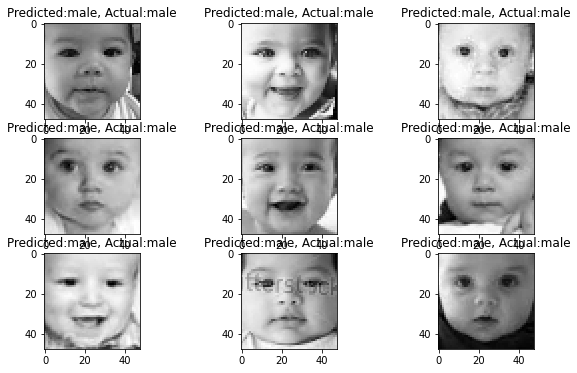

In [ ]:
'''test_eg = images[123]

correct = np.nonzero(pred == testing_labels)[0]
plt.figure(figsize=(6, 6))
i = 0
for c in correct[:9]:
    plt.subplot(3,3,i+1)
    plt.imshow(images[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted:{}, Actual:{}".format(pred_letters[c], y_test_letters[c]))
    plt.tight_layout()
    i += 1'''

gen_map = {0:'male' ,1: 'Female'}
plt.figure(figsize=(10, 6))
i =0
for img in images[200:209]:
  plt.subplot(3,3,i+1)
  c =model_gen.predict(np.expand_dims(img,axis =0))

  if c>0.5:
    c = 1
  else:
    c =0
  plt.imshow(np.squeeze(img ,axis =2) ,cmap ='gray' ,interpolation='none')
  
  plt.title("Predicted:{}, Actual:{}".format(gen_map[c], gen_map[data.gender[i]]))
  i+=1





![Alt Text](https://www.kudos.com/assets/Blog/b5843aa89b/thankyou__FillWzcwMCw0NDBd.jpg)



---



---



---



---



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
Total params: 592
Trainable params: 592
Non-trainable params: 0
_______________________________________________________________

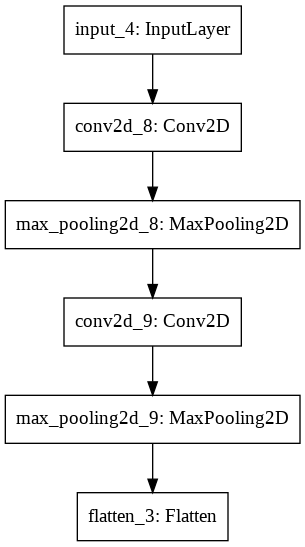

In [ ]:
# Convolutional Neural Network
import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
visible = Input(shape=(48,48,1))
conv1 = Conv2D(32, kernel_size=1, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=1, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
# hidden1 = Dense(10, activation='relu')(flat)
# output = Dense(1, activation='sigmoid')(hidden1)
model_rnd = Model(inputs=visible, outputs=flat)
# summarize layers
print(model_rnd.summary())
# plot graph
plot_model(model_rnd, to_file='convolutional_neural_network.png')

In [ ]:
model_eth = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    
    L.Conv2D(32, (3, 3), activation='relu'), 
    L.MaxPooling2D((2, 2)),
    L.BatchNormalization(),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.BatchNormalization(),
    
    L.Flatten()])

In [ ]:
y = data['ethnicity']

X_train ,X_test ,y_train ,y_test = train_test_split(images ,
                                                    y ,test_size =0.2)

In [ ]:
X_train.shape

(18964, 48, 48, 1)

In [ ]:
X_train_eth =model_eth(X_train)

In [ ]:
X_train_eth =np.array(X_train_eth)

In [ ]:
X_test_eth =np.array(model_eth(X_test))

In [ ]:
X_train_eth.shape

(18964, 6400)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_acc = []
rf_cm = []
i = 0
# for num_trees in range(100, 150):
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train_eth, y_train)
i+=1
print(i)

# rf_pred = rf_classifier.predict(in_test_rf)

# rf_acc.append(accuracy_score(testing_labels,rf_pred))
# rf_cm.append(confusion_matrix(Y_test,rf_pred))

# max_acc = max(rf_acc)
# max_acc_cm = rf_cm[rf_acc.index(max_acc)]
# print('maximum accuracy = ' + str(max_acc))
# print('confusion matrix = ')
# print(max_acc_cm)
# accuracy_metric.append(['RandomForestClassifier', max_acc])
# 0.933 without sc
# accuracy_metric.append(max_acc)

1


In [ ]:
y_pred = rf_classifier.predict(X_test_eth)

In [ ]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_pred ,y_test))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72      3170
           1       0.73      0.72      0.72       879
           2       0.44      0.81      0.57       392
           3       0.24      0.71      0.36       271
           4       0.08      0.97      0.15        29

    accuracy                           0.64      4741
   macro avg       0.48      0.76      0.51      4741
weighted avg       0.80      0.64      0.69      4741

